In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(202)

In [5]:
x0 = 1
N = 10000
s = 1

In [7]:
#Defining the PDF function 
def PDF(x):
    return 0.5 * np.exp(-np.abs(x))

In [9]:
# Random Walk Metropolis function
def rwm(N, s, x0): 
    chain = np.zeros(N) #initalise chain of length n with 0
    chain[0] = x0 #setting the first sample as the starting value x0
    for i in range(1, N): #loop from i = 1 to N-1 
        x_star = np.random.normal(loc=chain[i - 1], scale=s) # Simulating random number x* with a normal distribution with mean (i -1) and SD = s
        ratio = np.log(PDF(x_star)) - np.log(PDF(chain[i - 1]))  #acceptance ratio given in question 
        u = np.log(np.random.uniform()) # random value u form a uniform distribution between 0 and 1 
        if u < ratio:   #if u is bigger then ratio accept as x_star else, stay at previous value (i -1)
            chain[i] = x_star
        else:
            chain[i] = chain[i - 1]
    return chain

In [11]:
chain0 = rwm(N, s, x0)

In [13]:
#graph of f(x)
x_values = np.linspace(-10, 10, 10000) #10,000 evenly distributed values between -10 and 10 
fx_values = PDF(x_values) #applying the PDF function to values we stored 
fx_df = pd.DataFrame({'x': x_values, 'y': fx_values}) #storing x_values against the respective PDF value 
r_sample_df = pd.DataFrame({'Number': np.arange(1, N + 1), 'Results': chain0}) #creates a dataframe

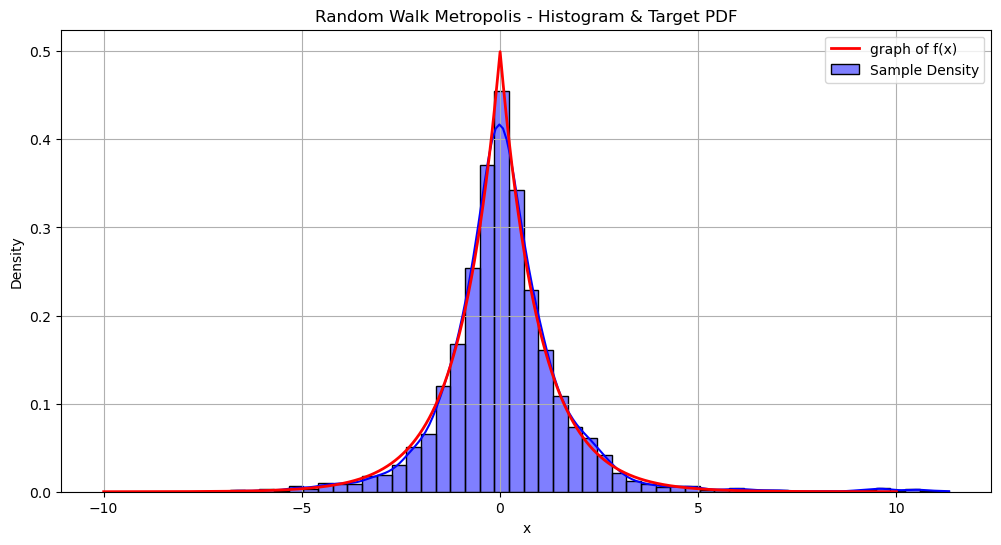

In [17]:
# Plot
plt.figure(figsize=(12, 6))
sns.histplot(chain0, bins=50, kde=True, stat="density", color='blue', alpha=0.5, label='Sample Density')
plt.plot(x_values, fx_values, color='red', linewidth=2, label='graph of f(x)')
plt.title('Random Walk Metropolis - Histogram & Target PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)



plt.savefig("random_walk_metropolis.png", dpi=300, bbox_inches='tight')
plt.show()

In [19]:
sample_mean = r_sample_df["Results"].mean()
print("The mean of the generated samples is", sample_mean)
sample_sd = r_sample_df["Results"].std()
print("The standard deviation of the generated samples is", sample_sd)

The mean of the generated samples is 0.10086085573189417
The standard deviation of the generated samples is 1.5887575767294413


In [21]:
# Setting initial values for j = 4 chains
x1 = 10
x2 = 20
x3 = 30
x4 = 40

In [23]:
# Setting Parameters
N = 2000  # Number of iterations per chain
s_values = np.linspace(0.001, 1, 1000)  # 1000 values between 0.001 and 1
J = 4  # Number of chains

In [25]:
# Chain 1
chain_matrix1 = np.zeros((N, len(s_values))) #creates a 2d NumPy array 
for i in range(len(s_values)): #runs RWM for s and starting value 
    s = s_values[i]
    chain1 = rwm(N, s, x1)
    chain_matrix1[:, i] = chain1 # stores the full chain in the ith column 

In [26]:
#Chain 2
chain_matrix2 = np.zeros((N, len(s_values)))
for i in range(len(s_values)):
    s = s_values[i]
    chain2 = rwm(N, s, x2)
    chain_matrix2[:, i] = chain2

In [27]:
# Chain 3
chain_matrix3 = np.zeros((N, len(s_values)))
for i in range(len(s_values)):
    s = s_values[i]
    chain3 = rwm(N, s, x3)
    chain_matrix3[:, i] = chain3

In [28]:
# Chain 4
chain_matrix4 = np.zeros((N, len(s_values)))
for i in range(len(s_values)):
    s = s_values[i]
    chain4 = rwm(N, s, x4)
    chain_matrix4[:, i] = chain4

In [33]:
#calculates the mean of each column 
def mean_chains(chain_matrix):
    Mj = np.mean(chain_matrix, axis=0)  #computing mean accross row 
    return Mj

In [35]:
#holds the mean sample result of each s value in the respective chain 
Mj1 = mean_chains(chain_matrix1)
Mj2 = mean_chains(chain_matrix2)
Mj3 = mean_chains(chain_matrix3)
Mj4 = mean_chains(chain_matrix4)

In [37]:
M = np.zeros(len(s_values))  # empty array to store the overall average of means across all 4 chains

for i in range(len(s_values)): # fro each s value, take the average respective mean from all 4 chains 
    M[i] = (Mj1[i] + Mj2[i] + Mj3[i] + Mj4[i]) / 4 #total average result for the i-th vlaue 

In [39]:
def var_chains(chain_matrix, mean_chain): 
    Vj = np.zeros(chain_matrix.shape[1])
    for i in range(chain_matrix.shape[1]):
        chain_col = chain_matrix[:, i]
        Vj[i] =    return Vj np.sum((chain_col - mean_chain[i])**2) / len(chain_col)


In [41]:
#Vj stores the within-chain variance for each s value across all iterations in that chain
Vj1 = var_chains(chain_matrix1, Mj1)
Vj2 = var_chains(chain_matrix2, Mj2)
Vj3 = var_chains(chain_matrix3, Mj3)
Vj4 = var_chains(chain_matrix4, Mj4)

In [43]:
W = np.zeros(len(s_values))
# mean of within-chain variances for each s value.
for i in range(len(s_values)):
    V1 = np.var(chain_matrix1[:, i])
    V2 = np.var(chain_matrix2[:, i])
    V3 = np.var(chain_matrix3[:, i])
    V4 = np.var(chain_matrix4[:, i])
    
    W[i] = (V1 + V2 + V3 + V4) / 4

In [45]:
B = np.zeros(len(s_values))
# variance of the means
for i in range(len(s_values)):
    B[i] = ((Mj1[i] - M[i])**2 +
            (Mj2[i] - M[i])**2 +
            (Mj3[i] - M[i])**2 +
            (Mj4[i] - M[i])**2) / 4

In [47]:
R = np.sqrt((B + W) / W)

In [49]:
print(R)

[569.97857798 362.18488031 202.31251107 152.01854591  96.86466531
  96.50415628 123.37066817  87.9441735   53.47992675  52.77781884
  61.73279446  52.80993886  57.55076485  46.17950668  40.48268024
  29.60235878  31.33796211  41.40761355  25.90031293  28.29518839
  31.59162259  23.38446812  39.3024418   29.091343    15.38611182
  23.09350394  19.70455062  22.15517298  28.62197997  20.36221297
  27.90372041  20.1820309   15.76566419  14.47166551  11.58753876
  15.06430175  10.04618683  15.69588049  13.99782659  11.1329107
  10.84748199  11.55937291   9.57340881  14.59186174  11.95207522
  11.97633676  12.88806435  12.36432062  13.49806084   7.69493908
   6.8306267    8.31571269   8.52430818   7.16270118  16.47825642
   9.08904268  12.53798414   7.98793099   5.88874084  12.42251319
   6.45243766   8.26419109   5.14819884   7.60417651   9.46784754
  11.1718672    9.65148983   7.37114558   6.63299003   6.35031204
   5.89217573   7.39626926   5.97708057   5.1565007    4.39587489
   6.707267

In [51]:
index = np.where(s_values == 0.001)[0][0]

# Get the corresponding R̂ value
Rhat = R[index]


print(f"The Rhat for the random walk Metropolis algorithm with N = {N}, s = 0.001 and J = {J} is {Rhat}")

The Rhat for the random walk Metropolis algorithm with N = 2000, s = 0.001 and J = 4 is 569.9785779835122


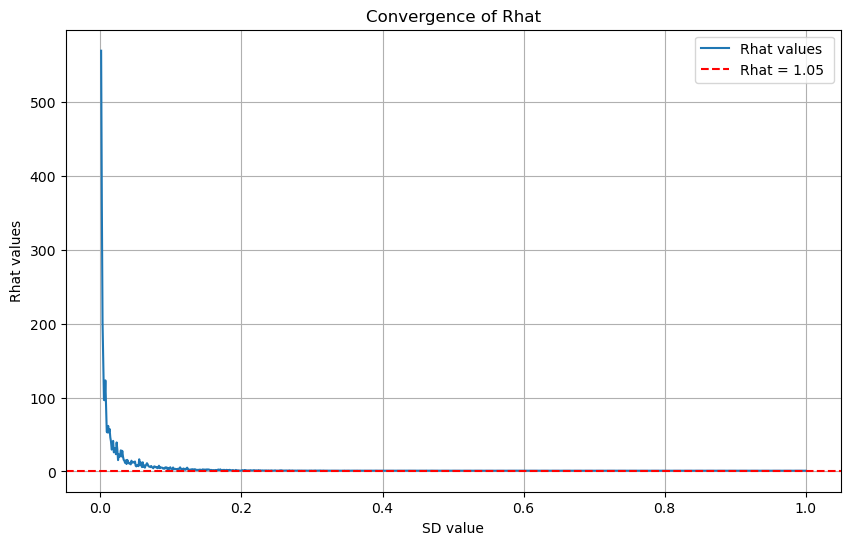

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(s_values, R, label='Rhat values')
plt.axhline(y=1.05, color='red', linestyle='--', label='Rhat = 1.05 ')
plt.title("Convergence of Rhat")
plt.xlabel("SD value")
plt.ylabel("Rhat values")
plt.legend()
plt.grid(True)
plt.savefig("Convergence.png", dpi=300, bbox_inches='tight')
plt.show()